In [1]:
!pip install tqdm

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from time import time
from bic import BIC
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from patsy import dmatrices
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

Domain: UCI Machine Learning Repository

Problem Statement:
Input: 210 data points belonging to three different varieties of wheat that are combinations of 7 attributes ranging from:
    1. area A, 
    2. perimeter P, 
    3. compactness C = 4*pi*A/P^2, 
    4. length of kernel, 
    5. width of kernel, 
    6. asymmetry coefficient 
    7. length of kernel groove. 

Learning: Train classification model 

Output: Using the model to predict variety of the wheat

Metric: Use accuracy to assess performance

In [3]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

Data Summary: n:210 p:7
            

In [4]:
seeds_df = pd.read_csv(SEEDS_DATA_URL, sep="\s+", header=None)
seeds_df.columns = ['area','perimeter','compactness','kernel_length','kernel_width','asymm_coeff','kerngroove_length','target']

In [5]:
seeds_df

,area,perimeter,compactness,kernel_length,kernel_width,asymm_coeff,kerngroove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


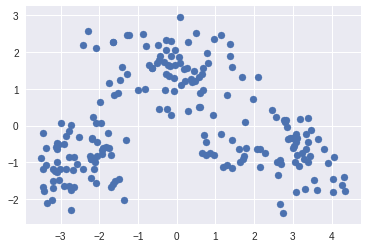

In [6]:
number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(seeds_df)
seeds_2d = pca.fit_transform(features_scaled)
plt.scatter(seeds_2d[:, 0], seeds_2d[:, 1])

<Figure size 2880x1440 with 0 Axes>

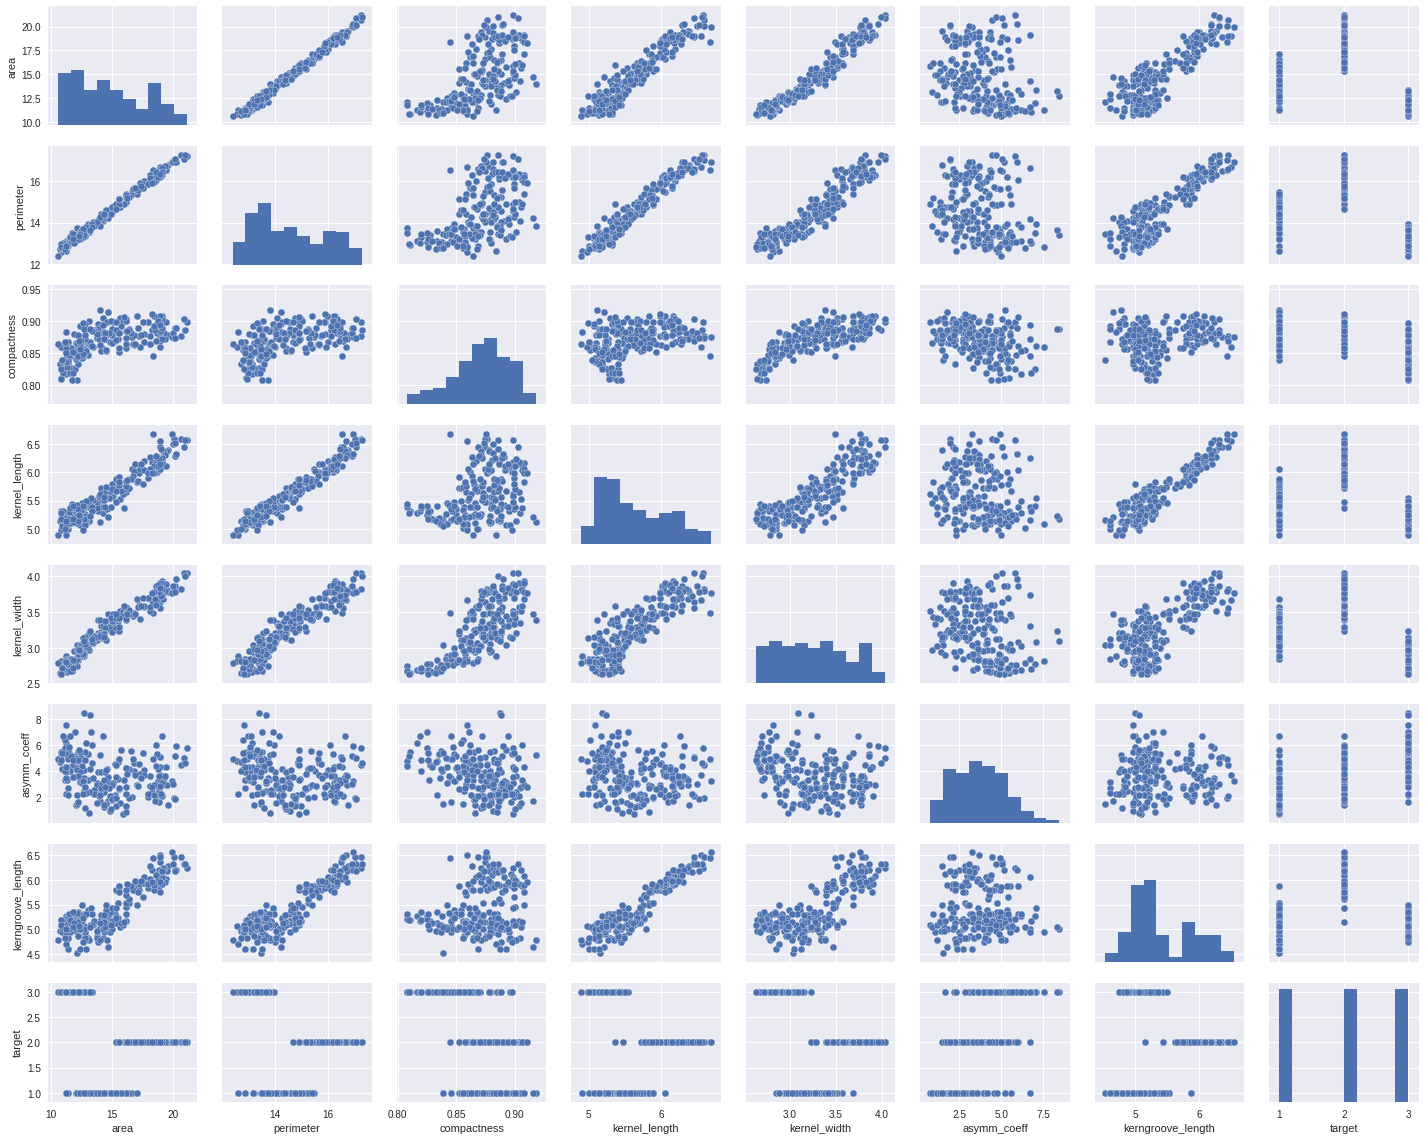

In [7]:
plt.figure(1, (40,20))

sns.pairplot(seeds_df, size=2, aspect=1.25)

In [8]:
seeds_df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymm_coeff,kerngroove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 

In [10]:
ks = range(2, 50)

kmeans_sc_models = []

X = seeds_df.drop('target', axis=1)
X_sc = (X - X.mean())/X.std()
for k in tqdm(ks):
    kmeans_sc_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X_sc))
kmeans_sc_models_df = process_results(kmeans_sc_models, X_sc)

100%|██████████| 48/48 [00:03<00:00, 12.51it/s]


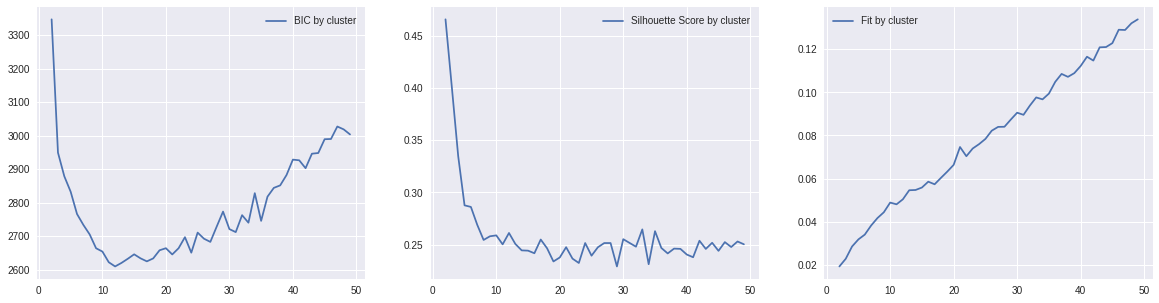

In [11]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

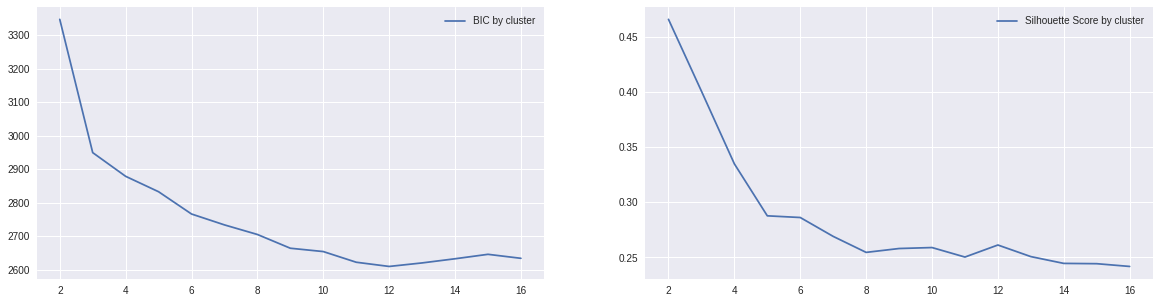

In [12]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.bic[:15], label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.sil_sc[:15], label='Silhouette Score by cluster')
ax[1].legend()

In [13]:
kmeans_sc_models_df.model.values[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans_2 = kmeans_sc_models_df.model.values[0]
kmeans_3 = kmeans_sc_models_df.model.values[1]
kmeans_4 = kmeans_sc_models_df.model.values[2]
kmeans_5 = kmeans_sc_models_df.model.values[3]

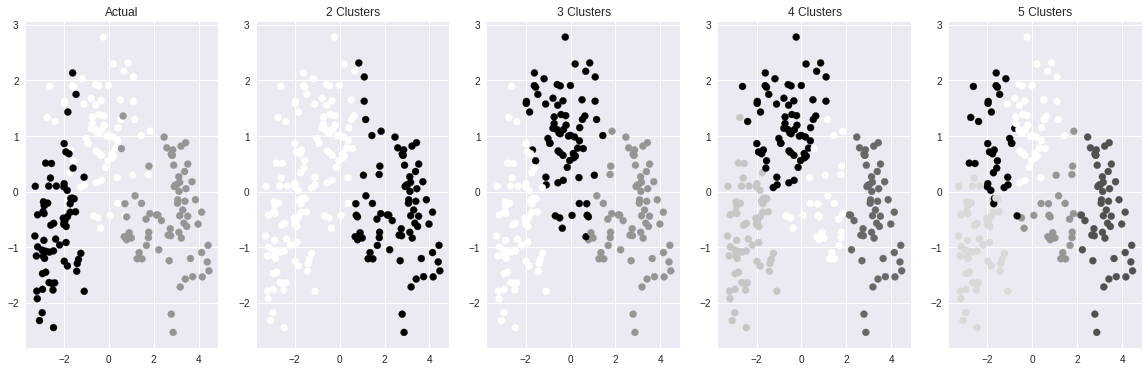

In [15]:
number_of_dimensions = 2
pca = PCA(number_of_dimensions)

_, ax = plt.subplots(1,5, figsize=(20,6))
seeds_2d = pca.fit_transform(X_sc)
ax[0].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=seeds_df.target)
ax[0].set_title('Actual')
ax[1].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_2.labels_)
ax[1].set_title('2 Clusters')
ax[2].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_3.labels_)
ax[2].set_title('3 Clusters')
ax[3].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_4.labels_)
ax[3].set_title('4 Clusters')
ax[4].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_5.labels_)
ax[4].set_title('5 Clusters');

In [16]:
def BIC(features, target, model):

   model.fit(features, target)

   prediction = model.predict_proba(features)

   n = len(target)

   p = features.shape[1]

   complexity = math.log(n)*(p+1)

   likelyhood = -2*log_loss(target, prediction)

   return complexity - likelyhood 

In [17]:
target_1, features_1 = dmatrices("target ~ area + perimeter + compactness + kernel_length + kernel_width + asymm_coeff", seeds_df)
target_2, features_2 = dmatrices("target ~ area + perimeter + compactness + kernel_length + kernel_width + kerngroove_length", seeds_df)
target_3, features_3 = dmatrices("target ~ area + perimeter + compactness + kernel_length + asymm_coeff + kerngroove_length", seeds_df)
target_4, features_4 = dmatrices("target ~ area + perimeter + compactness + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_5, features_5 = dmatrices("target ~ area + perimeter + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_6, features_6 = dmatrices("target ~ area + compactness + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_7, features_7 = dmatrices("target ~ perimeter + compactness + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)

lr_seeds_1 = LogisticRegression()
lr_seeds_2 = LogisticRegression()
lr_seeds_3 = LogisticRegression()
lr_seeds_4 = LogisticRegression()
lr_seeds_5 = LogisticRegression()
lr_seeds_6 = LogisticRegression()
lr_seeds_7 = LogisticRegression()

BIC_1 = BIC(features_1, target_1, lr_seeds_1)
print(BIC_1)
BIC_2 = BIC(features_2, target_2, lr_seeds_2)
print(BIC_2)
BIC_3 = BIC(features_3, target_3, lr_seeds_3)
print(BIC_3)
BIC_4 = BIC(features_4, target_4, lr_seeds_4)
print(BIC_4)
BIC_5 = BIC(features_5, target_5, lr_seeds_5)
print(BIC_5)
BIC_6 = BIC(features_6, target_6, lr_seeds_6)
print(BIC_6)
BIC_7 = BIC(features_7, target_7, lr_seeds_7)
print(BIC_7)

43.445939933
43.3804378115
43.2785888047
43.2791965365
43.2717473211
43.3371999919
43.6729747225


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
target_8, features_8 = dmatrices("target ~ area + perimeter + compactness + kernel_length + kernel_width + asymm_coeff", seeds_df)
target_9, features_9 = dmatrices("target ~ area + perimeter + compactness + kernel_length + kernel_width + kerngroove_length", seeds_df)
target_10, features_10 = dmatrices("target ~ area + perimeter + compactness + kernel_length + asymm_coeff + kerngroove_length", seeds_df)
target_11, features_11 = dmatrices("target ~ area + perimeter + compactness + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_12, features_12 = dmatrices("target ~ area + perimeter + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_13, features_13 = dmatrices("target ~ area + compactness + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)
target_14, features_14 = dmatrices("target ~ perimeter + compactness + kernel_length + kernel_width + asymm_coeff + kerngroove_length", seeds_df)

lr_seeds_8 = LogisticRegression()
lr_seeds_9 = LogisticRegression()
lr_seeds_10 = LogisticRegression()
lr_seeds_11 = LogisticRegression()
lr_seeds_12 = LogisticRegression()
lr_seeds_13 = LogisticRegression()
lr_seeds_14 = LogisticRegression()

BIC_8 = BIC(features_8, target_8, lr_seeds_8)
print(BIC_8)
BIC_9 = BIC(features_9, target_9, lr_seeds_9)
print(BIC_9)
BIC_10 = BIC(features_10, target_10, lr_seeds_10)
print(BIC_10)
BIC_11 = BIC(features_11, target_11, lr_seeds_11)
print(BIC_11)
BIC_12 = BIC(features_12, target_12, lr_seeds_12)
print(BIC_12)
BIC_13 = BIC(features_13, target_13, lr_seeds_13)
print(BIC_13)
BIC_14 = BIC(features_14, target_14, lr_seeds_14)
print(BIC_14)


43.445939933
43.3804378115
43.2785888047
43.2791965365
43.2717473211
43.3371999919
43.6729747225


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
target_15, features_15 = dmatrices("target ~ area + perimeter", seeds_df)
target_16, features_16 = dmatrices("target ~ area + compactness", seeds_df)
target_17, features_17 = dmatrices("target ~ area + kernel_length", seeds_df)
target_18, features_18 = dmatrices("target ~ area + kernel_width", seeds_df)
target_19, features_19 = dmatrices("target ~ area + asymm_coeff", seeds_df)
target_20, features_20 = dmatrices("target ~ area + kerngroove_length", seeds_df)

lr_seeds_15 = LogisticRegression()
lr_seeds_16 = LogisticRegression()
lr_seeds_17 = LogisticRegression()
lr_seeds_18 = LogisticRegression()
lr_seeds_19 = LogisticRegression()
lr_seeds_20 = LogisticRegression()

BIC_15 = BIC(features_15, target_15, lr_seeds_15)
print(BIC_15)
BIC_16 = BIC(features_16, target_16, lr_seeds_16)
print(BIC_16)
BIC_17 = BIC(features_17, target_17, lr_seeds_17)
print(BIC_17)
BIC_18 = BIC(features_18, target_18, lr_seeds_18)
print(BIC_18)
BIC_19 = BIC(features_19, target_19, lr_seeds_19)
print(BIC_19)
BIC_20 = BIC(features_20, target_20, lr_seeds_20)
print(BIC_20)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22.3321458648
22.612817445
22.429385515
22.5364530007
22.3665083139
22.3225079558


In [20]:
wheat_names = np.array(['kama','rosa','canadian'])
seeds_df['target']= seeds_df['target'] - 1
seeds_df['names']=[wheat_names[i] for i in seeds_df['target']]
seeds_df

,area,perimeter,compactness,kernel_length,kernel_width,asymm_coeff,kerngroove_length,target,names
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,0,kama
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,0,kama
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,0,kama
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,0,kama
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,0,kama
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,0,kama
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,0,kama
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,0,kama
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,0,kama
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,0,kama


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


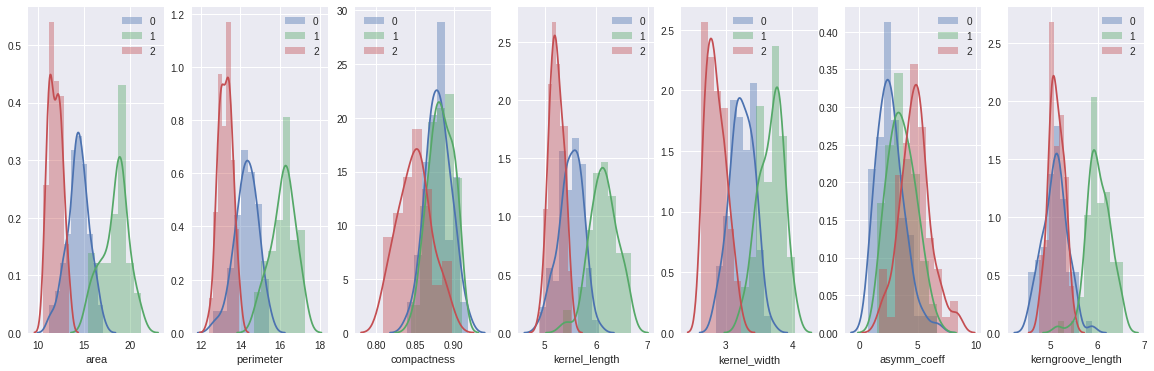

In [21]:
_, ax = plt.subplots(1,7, figsize=(20,6))

for i in range(7):
    for seeds_df.names in seeds_df.target.unique():
        plotting_df = seeds_df[seeds_df.target == seeds_df.names ]
        sns.distplot(plotting_df[seeds_df.columns[i]], ax=ax[i], label=seeds_df.names)
        ax[i].legend()

In [22]:
target_21, features_21 = dmatrices("target ~ compactness + asymm_coeff", seeds_df)
target_22, features_22 = dmatrices("target ~ compactness + asymm_coeff + kernel_length", seeds_df)
target_23, features_23 = dmatrices("target ~ compactness + asymm_coeff + kerngroove_length", seeds_df)
target_24, features_24 = dmatrices("target ~ compactness + asymm_coeff + kernel_length + kerngroove_length", seeds_df)

lr_seeds_21 = LogisticRegression()
lr_seeds_22 = LogisticRegression()
lr_seeds_23 = LogisticRegression()
lr_seeds_24 = LogisticRegression()


BIC_21 = BIC(features_21, target_21, lr_seeds_21)
print(BIC_21)
BIC_22 = BIC(features_22, target_22, lr_seeds_22)
print(BIC_22)
BIC_23 = BIC(features_23, target_23, lr_seeds_23)
print(BIC_23)
BIC_24 = BIC(features_24, target_24, lr_seeds_24)
print(BIC_24)


23.1944547753
28.0961694405
28.0081528689
33.1751542639


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()
features = seeds_df.drop('target', axis=1)
target_numerical = LabelEncoder().fit_transform(seeds_df['target'])

In [25]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features, target_numerical)

In [26]:
tree.fit(features_train, target_train)
target_prediction = tree.predict(features_validation)

In [27]:
def accuracy(actual, predicted):
    return 1-sum(np.abs(actual - predicted))/len(actual)

In [28]:
accuracy(target_validation, target_prediction)

0.77358490566037741